In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

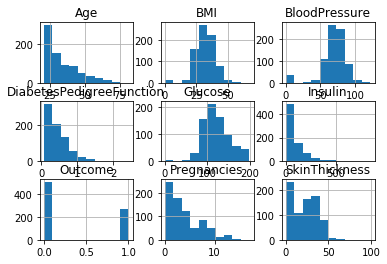

In [35]:
df.hist()
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
for col in df.columns:
    missing = df.loc[df[col]==0].shape[0]
    print(col+ ':'+ str(missing))

Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [38]:
import numpy as np

df['Glucose']= df['Glucose'].replace(0, np.nan)
df['BloodPressure']= df['BloodPressure'].replace(0, np.nan)
df['SkinThickness']= df['SkinThickness'].replace(0, np.nan)
df['Insulin']= df['Insulin'].replace(0, np.nan)
df['BMI']= df['BMI'].replace(0, np.nan)



df['Glucose']= df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure']= df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin']= df['Insulin'].fillna(df['Insulin'].mean())
df['BMI']= df['BMI'].fillna(df['BMI'].mean())

                         

In [39]:
### scale the dataset 

from sklearn import preprocessing 

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled['Outcome'] = df['Outcome']
df= df_scaled


C:\Users\Soona\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [40]:
### split the dataset to training and testing datasets

from sklearn.model_selection import train_test_split
features = df.iloc[:,0:8].values
labels = df.iloc[:,8].values

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

train_features, valid_features, train_labels, valid_labels = train_test_split(train_features, train_labels, test_size = 0.2)

 

In [41]:
from keras.models import Sequential
import tensorflow as tf

model = Sequential()

from keras.layers import Dense
model.add(Dense(64, activation='relu', input_dim=8))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [42]:
model.fit(train_features, train_labels, epochs =200)

Epoch 1/200
491/491 [==============================] - 0s 789us/step - loss: 0.7135 - accuracy: 0.4664
Epoch 2/200
491/491 [==============================] - 0s 69us/step - loss: 0.5955 - accuracy: 0.6823
Epoch 3/200
491/491 [==============================] - 0s 77us/step - loss: 0.5315 - accuracy: 0.7332
Epoch 4/200
491/491 [==============================] - 0s 66us/step - loss: 0.4910 - accuracy: 0.7637
Epoch 5/200
491/491 [==============================] - 0s 83us/step - loss: 0.4671 - accuracy: 0.7719
Epoch 6/200
491/491 [==============================] - 0s 76us/step - loss: 0.4521 - accuracy: 0.7719
Epoch 7/200
491/491 [==============================] - 0s 88us/step - loss: 0.4439 - accuracy: 0.7780
Epoch 8/200
491/491 [==============================] - 0s 75us/step - loss: 0.4368 - accuracy: 0.7800
Epoch 9/200
491/491 [==============================] - 0s 67us/step - loss: 0.4310 - accuracy: 0.7943
Epoch 10/200
491/491 [==============================] - 0s 75us/step - loss: 0.42

491/491 [==============================] - 0s 71us/step - loss: 0.2535 - accuracy: 0.8961
Epoch 81/200
491/491 [==============================] - 0s 61us/step - loss: 0.2478 - accuracy: 0.8961
Epoch 82/200
491/491 [==============================] - 0s 55us/step - loss: 0.2475 - accuracy: 0.8982
Epoch 83/200
491/491 [==============================] - 0s 53us/step - loss: 0.2451 - accuracy: 0.8941
Epoch 84/200
491/491 [==============================] - 0s 55us/step - loss: 0.2432 - accuracy: 0.9022
Epoch 85/200
491/491 [==============================] - 0s 63us/step - loss: 0.2425 - accuracy: 0.8921
Epoch 86/200
491/491 [==============================] - 0s 63us/step - loss: 0.2382 - accuracy: 0.8982
Epoch 87/200
491/491 [==============================] - 0s 67us/step - loss: 0.2367 - accuracy: 0.9002
Epoch 88/200
491/491 [==============================] - 0s 67us/step - loss: 0.2357 - accuracy: 0.8961
Epoch 89/200
491/491 [==============================] - 0s 55us/step - loss: 0.2347 - 

491/491 [==============================] - 0s 67us/step - loss: 0.1106 - accuracy: 0.9695
Epoch 160/200
491/491 [==============================] - 0s 67us/step - loss: 0.1098 - accuracy: 0.9715
Epoch 161/200
491/491 [==============================] - 0s 65us/step - loss: 0.1142 - accuracy: 0.9674
Epoch 162/200
491/491 [==============================] - 0s 66us/step - loss: 0.1063 - accuracy: 0.9817
Epoch 163/200
491/491 [==============================] - 0s 63us/step - loss: 0.1065 - accuracy: 0.9756
Epoch 164/200
491/491 [==============================] - 0s 67us/step - loss: 0.1040 - accuracy: 0.9715
Epoch 165/200
491/491 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 1.00 - 0s 62us/step - loss: 0.1002 - accuracy: 0.9796
Epoch 166/200
491/491 [==============================] - 0s 63us/step - loss: 0.1002 - accuracy: 0.9776
Epoch 167/200
491/491 [==============================] - 0s 76us/step - loss: 0.1006 - accuracy: 0.9776
Epoch 168/200
491/491 [=============

In [43]:
train_score = model.evaluate(train_features, train_labels)
print(train_score)

test_score = model.evaluate(test_features, test_labels )
print(test_score)

491/491 [==============================] - 0s 220us/step
[0.06139539564578451, 0.9959266781806946]
154/154 [==============================] - 0s 52us/step
[0.894981596764032, 0.7272727489471436]


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediction = model.predict_classes(test_features)

print(confusion_matrix(test_labels, prediction))

[[84 21]
 [21 28]]
